In [1]:
from jax.config import config
config.update("jax_enable_x64", True)
import jax
import jax.numpy as np
import tensorflow_probability.substrates.jax as tfp
tfd = tfp.distributions
tfb = tfp.bijectors
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import tqdm.auto as tqdm
from PIL import Image, ImageOps
rng = jax.random.PRNGKey(2)

In [2]:
dataid=1

In [3]:
# get comparison to true posterior
# prior = uniform([0., 0.2], [2., 0.8])
# load marginals from Tom's code
size = 250
marginal = np.load('./marginal_field_%d_20x20_field.npy'%(dataid))
arr = marginal[~np.isnan(marginal)]
inds = np.argsort(arr)[::-1]
cdf = np.cumsum(arr[inds] / arr.sum())
levels = [arr[inds[np.argmin(np.abs(i - cdf))]] for i in [0.99, 0.95, 0.68, 0.]]


In [8]:
# pull in abc marginals
abc_marginal = np.load('abc_marginal_field_%d.npy'%(dataid))
distances = np.load('abc_distances.npy')

<ipython-input-14-461532707878>:3: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(np.linspace(0., 2., size), np.linspace(0.2, 0.8, size), marginal, levels=levels, label='DA')


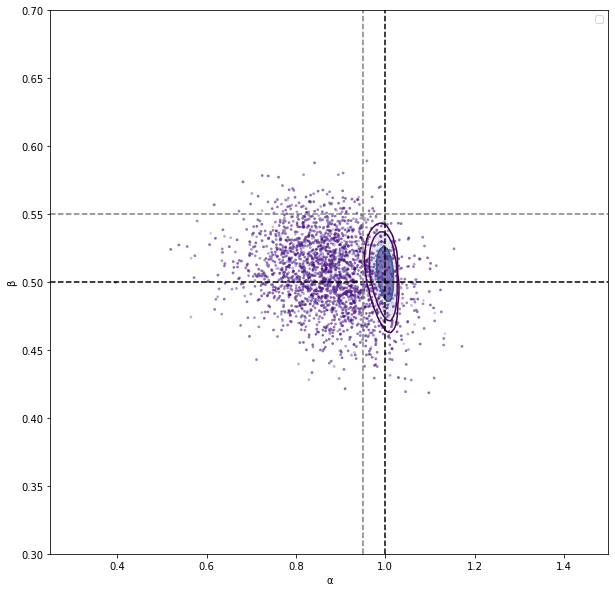

In [14]:
plt.figure(figsize=(10, 10))
plt.contourf(np.linspace(0., 2., size), np.linspace(0.2, 0.8, size), marginal, levels=levels, cmap="Purples")
plt.contour(np.linspace(0., 2., size), np.linspace(0.2, 0.8, size), marginal, levels=levels, label='DA')
plt.scatter(abc_marginal.T[0], abc_marginal.T[1], s=30, alpha=0.6,
                c=np.log(distances), cmap='Purples', edgecolors=None, linewidths=0, marker='.')
plt.xlabel("α")
plt.ylabel("β")
plt.ylim(0.3, 0.7)
plt.xlim(0.25, 1.5)
plt.axvline(1.0, linestyle="dashed", color="black")
plt.axhline(0.5, linestyle="dashed", color="black");

plt.axvline(0.95, linestyle="dashed", color="gray")
plt.axhline(0.55, linestyle="dashed", color="gray");
plt.legend()
#plt.savefig("IMNN_vs_BHM_field_%d.svg"%(dataid), bbox_inches="tight", transparent=True)

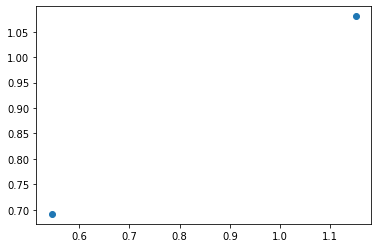

In [6]:
plt.scatter(abc_marginal[0], abc_marginal[1])

In [13]:
abc_marginal.shape

(1026, 2)